## ANALISIS BIVARIADO DEL PROYECTO : ML RISKY ROUTE

In [1]:
#Importamos los paquetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importo el data set y visualizo las primeras filas.
df=pd.read_csv("C:/Users/mmartorana/Downloads/CoderHouse/Data_set.csv", sep=",")
df.head()

,SHP_SHIPMENT_ID,SIT_SITE_ID,SHP_DATE_SHIPPED_ID,SHP_LG_ROUTE_ID,SHP_LG_FACILITY_ID,SHP_LG_CLUSTER_ID,SHP_LG_STATUS,SHP_LG_SUB_STATUS,SHP_LOGISTIC_CENTER_ID,PICKING_TYPE,...,LAST_UPDATED,SHP_COMPANY_NAME,SHP_LG_VEHICLE_PLATE_ID,SHP_LG_VEHICLE_TYPE,SHP_LG_DRIVER_ID,SHP_LG_CALCULATED_DISTANCE,SHP_LG_PLANNED_DISTANCE,Driver,SHP_ORDER_COST_USD,Volumen
0,40584763561,MLA,2021-06-01,2469456,SRO1,R2,on_route,delivered,ARXCF1,XD,...,2021-06-01,Mail Express,GNJ475,Fiorino,34908,18.51,22.09,Cesar Sfilio,84.53,1000.0
1,40588014662,MLA,2021-05-21,2421940,SRO1,R1,on_route,delivered,ARXCF1,XD,...,2021-05-21,Mail Express,MQN418,Fiorino,32122,39.63,24.98,Vicente Teves,6.69,19980.0
2,40591308028,MLA,2021-05-21,2422031,SRO1,R3,on_route,delivered,ARXCF1,XD,...,2021-05-21,Mail Express,HJD603,Fiorino,33129,33.09,27.25,Silvina Deseta,14.13,9300.0
3,40592260086,MLA,2021-05-22,2437529,SRO1,R1,on_route,delivered,ARBA01,XD,...,2021-05-26,Mail Express,AA303FZ,Fiorino,34649,21.38,31.00,Locret German,66.82,29160.0
4,40591198804,MLA,2021-05-21,2422038,SRO1,R4,on_route,delivered,ARBA01,XD,...,2021-05-21,Mail Express,AB382BK,Fiorino,139993,53.71,37.55,Analia Pineschi,56.69,4862.0


In [3]:
df.shape

(990869, 21)

In [4]:
df.count()

SHP_SHIPMENT_ID               990869
SIT_SITE_ID                   990869
SHP_DATE_SHIPPED_ID           990869
SHP_LG_ROUTE_ID               990869
SHP_LG_FACILITY_ID            990869
SHP_LG_CLUSTER_ID             990869
SHP_LG_STATUS                 990869
SHP_LG_SUB_STATUS             990869
SHP_LOGISTIC_CENTER_ID        990864
PICKING_TYPE                  990869
Clasificacion                 990869
LAST_UPDATED                  990869
SHP_COMPANY_NAME              990869
SHP_LG_VEHICLE_PLATE_ID       990869
SHP_LG_VEHICLE_TYPE           990869
SHP_LG_DRIVER_ID              990869
SHP_LG_CALCULATED_DISTANCE    987025
SHP_LG_PLANNED_DISTANCE       981576
Driver                        990869
SHP_ORDER_COST_USD            990844
Volumen                       989706
dtype: int64

In [5]:
df.dtypes

SHP_SHIPMENT_ID                 int64
SIT_SITE_ID                    object
SHP_DATE_SHIPPED_ID            object
SHP_LG_ROUTE_ID                 int64
SHP_LG_FACILITY_ID             object
SHP_LG_CLUSTER_ID              object
SHP_LG_STATUS                  object
SHP_LG_SUB_STATUS              object
SHP_LOGISTIC_CENTER_ID         object
PICKING_TYPE                   object
Clasificacion                  object
LAST_UPDATED                   object
SHP_COMPANY_NAME               object
SHP_LG_VEHICLE_PLATE_ID        object
SHP_LG_VEHICLE_TYPE            object
SHP_LG_DRIVER_ID                int64
SHP_LG_CALCULATED_DISTANCE    float64
SHP_LG_PLANNED_DISTANCE       float64
Driver                         object
SHP_ORDER_COST_USD            float64
Volumen                       float64
dtype: object

<AxesSubplot:xlabel='SHP_ORDER_COST_USD', ylabel='SHP_LG_PLANNED_DISTANCE'>

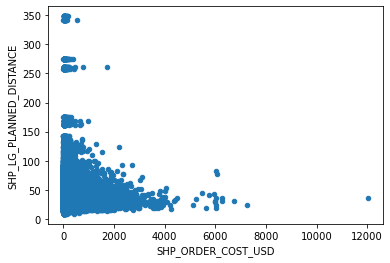

In [8]:
#Scatterplot
df.plot.scatter(x='SHP_ORDER_COST_USD', y='SHP_LG_PLANNED_DISTANCE')

<AxesSubplot:xlabel='SHP_LG_CALCULATED_DISTANCE', ylabel='SHP_LG_PLANNED_DISTANCE'>

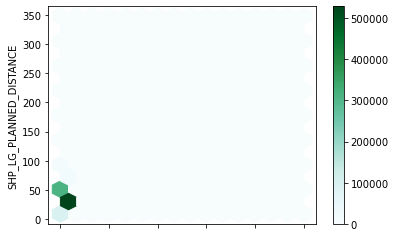

In [12]:
df.plot.hexbin(x='SHP_LG_CALCULATED_DISTANCE', y='SHP_LG_PLANNED_DISTANCE', gridsize=15)

In [15]:
df_type = df.groupby(['PICKING_TYPE', 'SHP_LG_SUB_STATUS']).mean()[['SHP_LG_CALCULATED_DISTANCE', 'SHP_ORDER_COST_USD']]
df_type

SHP_LG_CALCULATED_DISTANCE  SHP_ORDER_COST_USD
PICKING_TYPE SHP_LG_SUB_STATUS                                                
FBM          claimed                              0.000000          132.625000
             delivered                          129.855853           70.897893
             delivered_place                     16.260000           85.770000
             for_return                          61.195000           78.435000
             lost                                 7.180588           98.777059
             problem_solving                      0.000000           63.880000
             return                              53.667345           91.314127
             route_cancelled                      0.000000           12.750000
             sorting                             20.001333           53.861333
             stolen                               8.938621           45.704483
XD           damaged                             71.490000          215.180000
             delivered                           73.675509           55.184504
             delivered_place                     19.530000           79.080000
             for_return                           0.000000            7.480000
             lost                                14.516939           53.848200
             problem_solving                     42.940000           23.016667
             return                              56.431675           62.247969
             sorting                             16.058615           67.768769
             stolen                               5.373043           58.795942

<AxesSubplot:xlabel='PICKING_TYPE,SHP_LG_SUB_STATUS'>

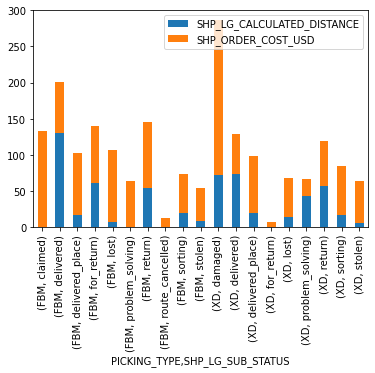

In [17]:
df_type.plot.bar(stacked=True)